In [1]:
#models = ['GIN', 'GAT', 'GCNN', 'GatedGCNN']
# note, no twitter.
TUdataset_names = ["RANDOM",'ENZYMES', 'PROTEINS', 'IMDB-BINARY', 'MUTAG', 'COLLAB']
prefixes = ['230908_hparam_bigrandom', '230913_hparam_bigrandom_PE']
params = ['num_layers', 'TUdataset_name', 'vc_penalty', 'rank', 'positional_encoding', 'repeat_lift_layers']

In [3]:
import os
import json
import pandas as pd
import numpy as np

folder_path = '/home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs'
model_list = [os.path.join(folder_path,x) for x in os.listdir(folder_path) for prefix in prefixes if x.startswith(prefix)]


rows = []
for model_folder in model_list:
    try:
        with open(os.path.join(model_folder, 'params.txt'), 'r') as f:
            model_args = json.load(f)
        
        losses = np.load(os.path.join(model_folder, 'valid_scores.npy'))
        modeldict = {x: model_args[x] for x in params if x in model_args.keys()}
        modeldict['scores'] = losses[-1]
        rows.append(modeldict)
        
    except Exception as e:
        print(f'{e} is wrong w/ {model_folder}')

[Errno 2] No such file or directory: '/home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230908_hparam_bigrandom_paramhash:45d1e70b28315bcdae0633c7d4ca62eba2f0b723cd15210804d750f5471d4b9a/valid_scores.npy' is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230908_hparam_bigrandom_paramhash:45d1e70b28315bcdae0633c7d4ca62eba2f0b723cd15210804d750f5471d4b9a
[Errno 2] No such file or directory: '/home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230913_hparam_bigrandom_PE_paramhash:4d0a2095221ba690bfc1a8333a6ac69568c34972cbdd23c5125b17dd9bb428ec/valid_scores.npy' is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230913_hparam_bigrandom_PE_paramhash:4d0a2095221ba690bfc1a8333a6ac69568c34972cbdd23c5125b17dd9bb428ec
[Errno 2] No such file or directory: '/home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs/230908_hparam_bigrandom_paramhash:a74018ab7cab52050e4ea794c3540368f1ee93c2f4393fc6be425f10610fb0ff/valid_scores.npy' is wrong w/ /home/bcjexu/maxcut-80/bespoke-gnn4

In [4]:
#rows.append({'TUdataset_name': 'Dummy',
#             'scores': 0})

In [5]:
df = pd.DataFrame.from_records(rows)

In [6]:
df = df.fillna("None")

In [7]:
df.sort_values('scores', ascending = False)

,num_layers,TUdataset_name,vc_penalty,rank,positional_encoding,scores,repeat_lift_layers
9,6,RANDOM,1.0,8,laplacian_eigenvector,-466.460,"[1, 3, 3, 3, 3, 1]"
39,10,RANDOM,1.0,16,laplacian_eigenvector,-468.310,None
0,10,RANDOM,1.0,8,laplacian_eigenvector,-468.515,None
25,6,RANDOM,1.0,8,laplacian_eigenvector,-468.555,"[2, 2, 2, 2, 2, 2]"
17,6,RANDOM,1.0,8,laplacian_eigenvector,-468.745,"[1, 2, 2, 2, 2, 1]"
6,12,RANDOM,1.0,8,laplacian_eigenvector,-468.930,None
20,10,RANDOM,1.0,8,None,-469.515,None
32,12,RANDOM,1.0,8,None,-471.260,None
2,6,RANDOM,1.0,8,laplacian_eigenvector,-471.745,"[1, 1, 1, 1, 1, 1]"
18,6,RANDOM,1.0,8,None,-471.795,None


In [13]:
import seaborn as sns

TypeError: unhashable type: 'list'

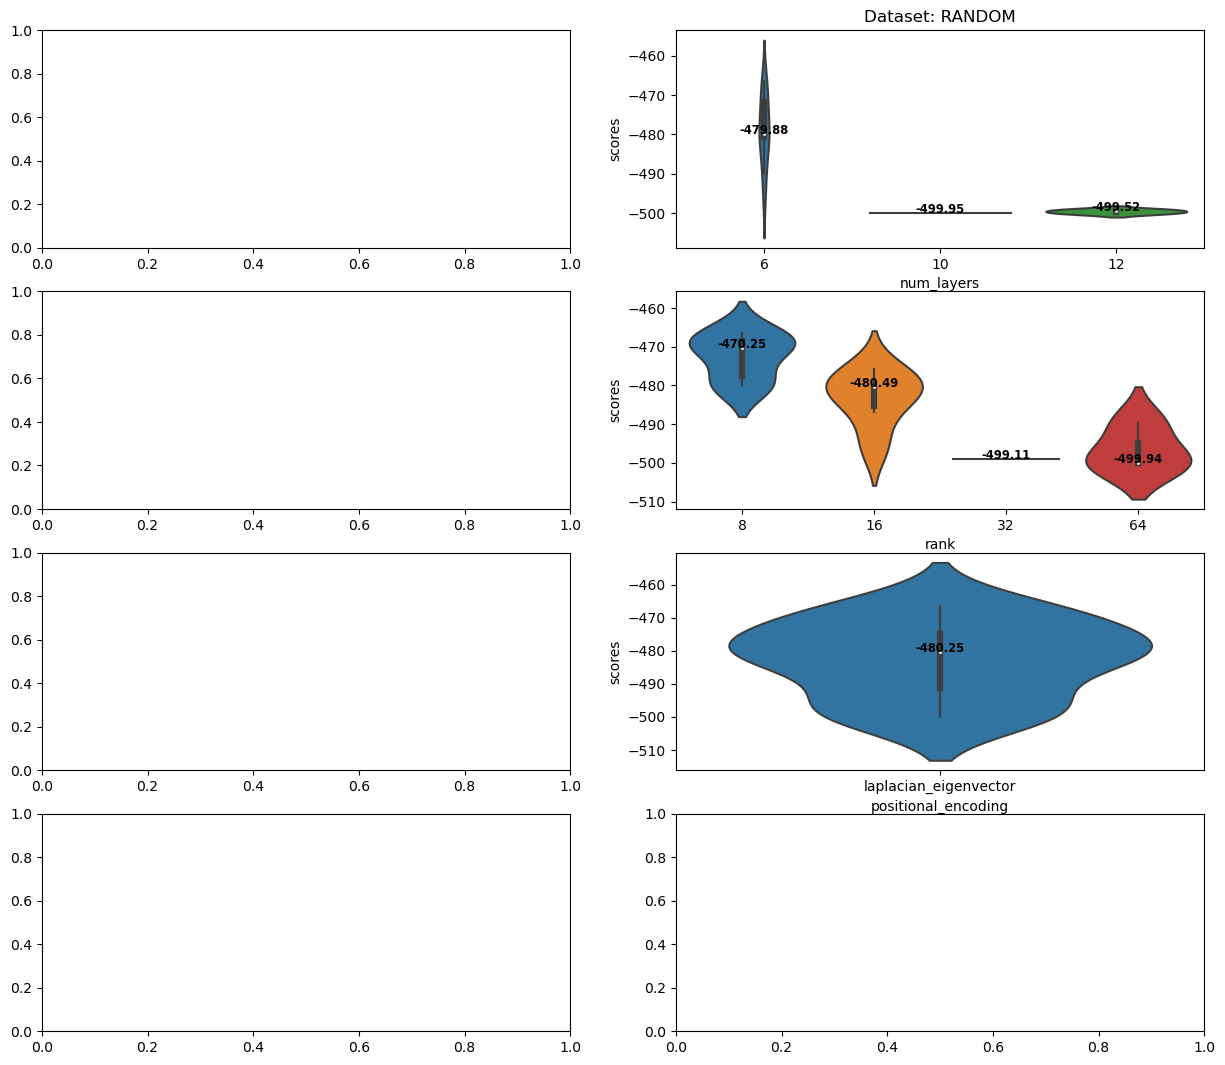

In [14]:
# hparams in rows
# datasets in colums
rows = [x for x in params if x not in ["TUdataset_name", 'vc_penalty']]
columns = {'RANDOM', 'Dummy'} #set(df.TUdataset_name).union(set("Dummy"))
import matplotlib.pyplot as plt

fig, axs= plt.subplots(nrows=len(rows), ncols=len(columns), figsize=(15, 13))

for i, x in enumerate(columns):
    dfx = df[df.TUdataset_name == x]
    if len(dfx) == 0: continue
    for j, y_name in enumerate(rows):
        ax = axs[j][i]
        x_vals = dfx[y_name]
        y_vals = dfx['scores']

        sns.violinplot(x=x_vals, y=y_vals, ax=ax)
        medians = dfx.groupby([y_name])['scores'].median()#
        try:
            median_dict = dict(zip([f'{float(x):0.2f}' for x in medians.keys()], medians.values))
        except:
            median_dict = dict(zip([x for x in medians.keys()], medians.values))
        pos = range(len(medians))
        for tick, label in enumerate(ax.get_xticklabels()):
            try:
                label = f'{float(label.get_text()):0.2f}'
            except:
                label = label.get_text()
            #print(median_dict)
            #if median_dict.get(label, None) is not None:
            ax.text(pos[tick], median_dict[label] + 0.01, f'{median_dict[label]:0.2f}',
                        horizontalalignment='center',
                        size='small',
                        color='k',
                        weight='semibold')
    
        if j == 0:
            ax.set(title=f"Dataset: {x}")

plt.show()

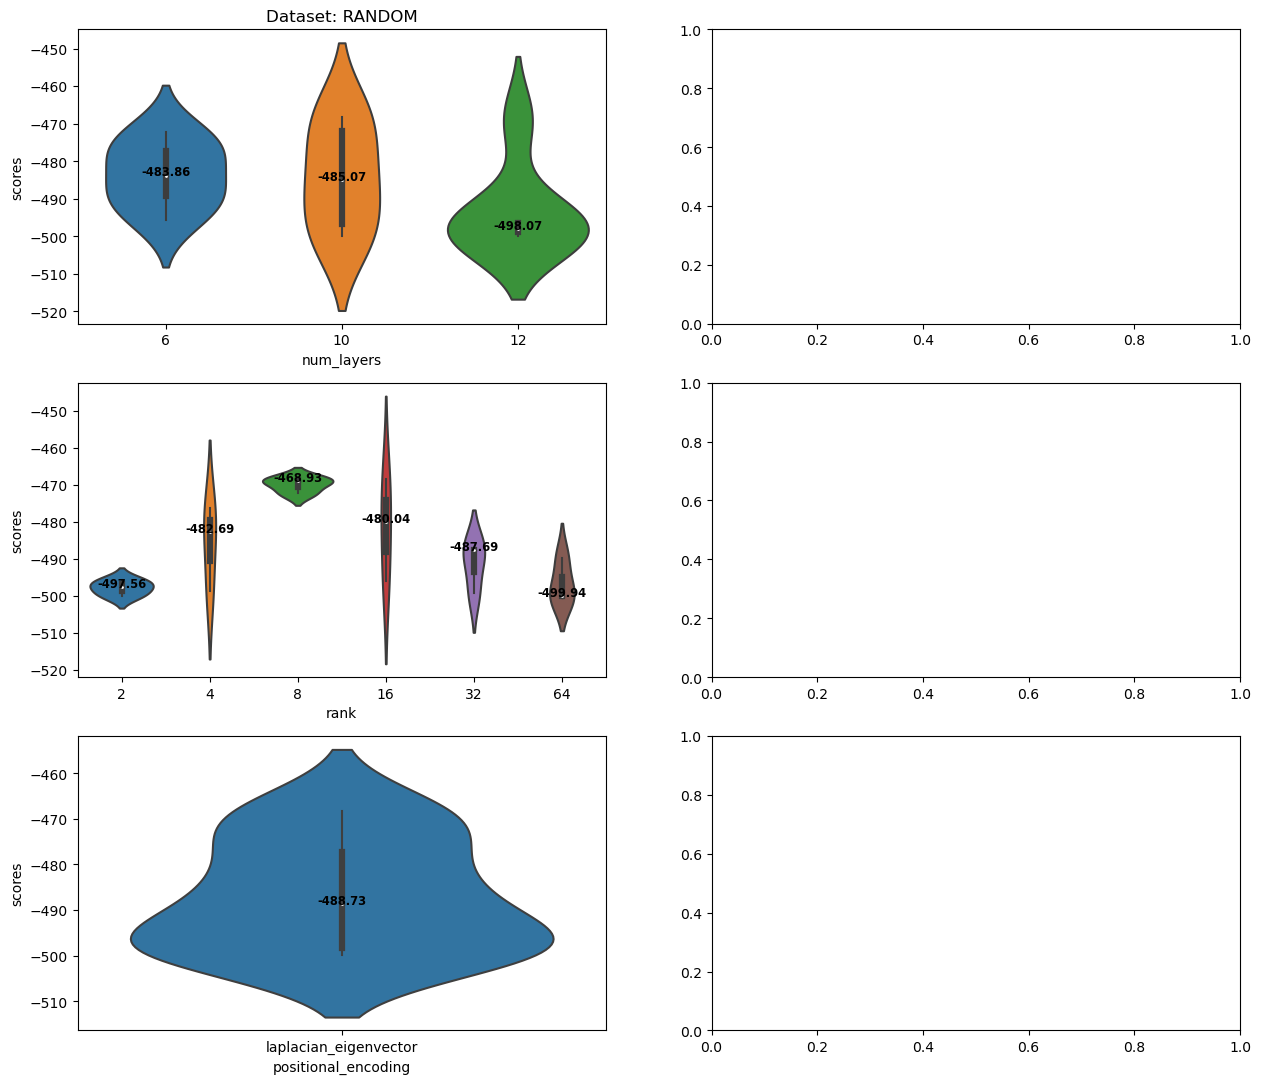

In [19]:
# hparams in rows
# datasets in colums
rows = [x for x in params if x not in ["TUdataset_name", 'vc_penalty']]
columns = {'RANDOM', 'Dummy'} #set(df.TUdataset_name).union(set("Dummy"))
import matplotlib.pyplot as plt

fig, axs= plt.subplots(nrows=len(rows), ncols=len(columns), figsize=(15, 13))

for i, x in enumerate(columns):
    dfx = df[(df.TUdataset_name == x)& (df.positional_encoding != "None")]
    if len(dfx) == 0: continue
    for j, y_name in enumerate(rows):
        ax = axs[j][i]
        x_vals = dfx[y_name]
        y_vals = dfx['scores']

        sns.violinplot(x=x_vals, y=y_vals, ax=ax)
        medians = dfx.groupby([y_name])['scores'].median()#
        try:
            median_dict = dict(zip([f'{float(x):0.2f}' for x in medians.keys()], medians.values))
        except:
            median_dict = dict(zip([x for x in medians.keys()], medians.values))
        pos = range(len(medians))
        for tick, label in enumerate(ax.get_xticklabels()):
            try:
                label = f'{float(label.get_text()):0.2f}'
            except:
                label = label.get_text()
            #print(median_dict)
            #if median_dict.get(label, None) is not None:
            ax.text(pos[tick], median_dict[label] + 0.01, f'{median_dict[label]:0.2f}',
                        horizontalalignment='center',
                        size='small',
                        color='k',
                        weight='semibold')
    
        if j == 0:
            ax.set(title=f"Dataset: {x}")

plt.show()